## Jupyter notebook basics

### Code cells

### Text cells

## Access to the shell

## Install Spark

In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Reading package lists... Done
E: List directory /var/lib/apt/lists/partial is missing. - Acquire (13: Permission denied)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [42]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

In [1]:
pwd


'/home/jovyan/work'

In [7]:
import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [8]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

In [9]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [10]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [11]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [12]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|0486|
|0870|
|0810|
|2023|
|0560|
+----+
only showing top 5 rows



In [14]:
rc.select(rc.IUCR).show(10)

+----+
|IUCR|
+----+
|0486|
|0870|
|0810|
|2023|
|0560|
|0610|
|0620|
|0860|
|0320|
|1153|
+----+
only showing top 10 rows



In [16]:
rc.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|0486|
|0870|
|0810|
|2023|
|0560|
+----+
only showing top 5 rows



In [17]:
rc.select('Case Number', 'Date', 'Arrest').show(5)

+-----------+-------------------+------+
|Case Number|               Date|Arrest|
+-----------+-------------------+------+
|   HY411648|2015-09-05 13:30:00| false|
|   HY411615|2015-09-04 11:30:00| false|
|   JC213529|2018-09-01 00:01:00| false|
|   HY411595|2015-09-05 12:45:00|  true|
|   HY411610|2015-09-05 13:00:00| false|
+-----------+-------------------+------+
only showing top 5 rows



In [18]:
from pyspark.sql.functions import lit
rc.withColumn('One', lit(1)).show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|

In [21]:
#rc=rc.drop('IUCR')
rc.drop('IUCR')
rc.show(5)

+--------+-----------+-------------------+--------------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            6

In [36]:
#Manupilate rows
one_day=spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2015-09-05'))
one_day.count()
one_day.show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224825|   HY411703|2015-09-05 00:00:00|  106XX S SAWYER AVE|0820|               THEFT|      $500 AND UNDER|              STR

In [35]:
rc.union(one_day).orderBy('Date', ascending=False).show(15)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11635448|   JC200791|2018-11-10 12:00:00|036XX N PINE GROV...|1150|  DECEPTIVE PRACTICE|   CREDIT CARD FRAUD|           RESIDENCE| false|   false|1925|     019|  46|             6|      

In [37]:
#show top 10 number of reported crimes by primary type , in descending order of occurence
rc.groupBy('Primary Type').count().show()

+--------------------+-----+
|        Primary Type|count|
+--------------------+-----+
|OFFENSE INVOLVING...| 2363|
|CRIMINAL SEXUAL A...|   20|
|            STALKING|  139|
|PUBLIC PEACE VIOL...| 1920|
|           OBSCENITY|   47|
|               ARSON|  486|
|            GAMBLING|  259|
|   CRIMINAL TRESPASS| 6236|
|             ASSAULT|17587|
|      NON - CRIMINAL|   13|
|LIQUOR LAW VIOLATION|  269|
| MOTOR VEHICLE THEFT|10886|
|               THEFT|59767|
|             BATTERY|49544|
|             ROBBERY|11283|
|            HOMICIDE|   52|
|    PUBLIC INDECENCY|   12|
| CRIM SEXUAL ASSAULT| 1516|
|   HUMAN TRAFFICKING|   15|
|        INTIMIDATION|  126|
+--------------------+-----+
only showing top 20 rows



In [38]:
rc.groupBy('Primary Type').count().orderBy('count', ascending=False).show(10)

+-------------------+-----+
|       Primary Type|count|
+-------------------+-----+
|              THEFT|59767|
|            BATTERY|49544|
|    CRIMINAL DAMAGE|30927|
| DECEPTIVE PRACTICE|17664|
|          NARCOTICS|17626|
|            ASSAULT|17587|
|      OTHER OFFENSE|17567|
|           BURGLARY|14257|
|            ROBBERY|11283|
|MOTOR VEHICLE THEFT|10886|
+-------------------+-----+
only showing top 10 rows



In [39]:
#percentage of reported crimes resulted in an arrest
rc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [41]:
rc.filter(col('Arrest') ==  'true').count()/rc.select('Arrest').count()

0.22259757653299814

In [42]:
#top 3 location reported crimes
rc.groupBy('Location Description').count().show()

+--------------------+-----+
|Location Description|count|
+--------------------+-----+
|AIRPORT TERMINAL ...|  178|
|POLICE FACILITY/V...|  765|
|            SIDEWALK|26359|
|AIRPORT TERMINAL ...|    9|
|CTA GARAGE / OTHE...|  247|
|            CAR WASH|  118|
|    AIRPORT/AIRCRAFT|   60|
|MEDICAL/DENTAL OF...|  274|
|         CTA STATION|  718|
|SCHOOL, PUBLIC, G...|  973|
|SPORTS ARENA/STADIUM|  338|
|               HOUSE|    3|
|          VACANT LOT|    1|
|SCHOOL, PRIVATE, ...|  544|
|  VEHICLE-COMMERCIAL|  227|
|           WAREHOUSE|  261|
|     APPLIANCE STORE|   72|
|AIRPORT TERMINAL ...|  242|
|VEHICLE - OTHER R...|  104|
|AIRPORT EXTERIOR ...|   68|
+--------------------+-----+
only showing top 20 rows



In [44]:
rc.groupBy('Location Description').count().orderBy('count', ascending=False).show(3)

+--------------------+-----+
|Location Description|count|
+--------------------+-----+
|              STREET|59589|
|           RESIDENCE|43810|
|           APARTMENT|35600|
+--------------------+-----+
only showing top 3 rows



In [46]:
from pyspark.sql.functions import mean
from pyspark.sql import functions
print(dir(functions))


['Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_udf', '_get_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_column', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'array_distinct', 'array_except', 'array_intersect', 'array_join', 'array_max', 'array_min', 'array_position', 'array_remove', 'array_repeat', 'array_sort', 'array_union', 'arrays_overlap', 'arrays_zip', 'asc', 'asc_nulls_first', 'asc_nulls_last', 'ascii', 'asin', 'asinh', 'assert_true', 'atan', 'atan2', 'atanh', 'a

In [47]:
#built-in function
from pyspark.sql.functions import lower, upper, substring
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [48]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [49]:
#Display Primary Type column in lower and upper characters, and the first 4 characters of the column
rc.select(lower(col('Primary Type')), upper(col('Primary Type')), substring(col('Primary Type'),1,4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|            battery|            BATTERY|                         BATT|
|              theft|              THEFT|                         THEF|
|              theft|              THEFT|                         THEF|
|          narcotics|          NARCOTICS|                         NARC|
|            assault|            ASSAULT|                         ASSA|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



In [52]:
#show the oldest and the most recent date
from pyspark.sql.functions import min, max
rc.select(min(col('Date')), max(col('Date'))).show(5)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-10 12:00:00|
+-------------------+-------------------+



In [53]:
#what is 3 days earlier than the oldest date and 3 days later than the most recent date
from pyspark.sql.functions import date_add, date_sub
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start, days)
    Returns the date that is `days` days after `start`
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 9))]



In [54]:
rc.select(date_sub(min(col('Date')), 3), date_add(max(col('Date')),3)).show()

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-13|
+----------------------+----------------------+



In [58]:
from pyspark.sql.functions import to_date, to_timestamp, lit
rc.select(to_date(lit('2019-12-25')), to_date(lit('2019-25-15'))).show(1)

+-------------------+-------------------+
|to_date(2019-12-25)|to_date(2019-25-15)|
+-------------------+-------------------+
|         2019-12-25|               null|
+-------------------+-------------------+
only showing top 1 row



In [60]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)],['Christmas'])
df.show()

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [62]:
df.select(to_date(col('Christmas'),'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'),'yyyy-MM-dd HH:mm:ss')).show(1)

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



In [1]:
from pyspark.sql.types import StructType,StructField, StringType, IntegerType
data2 = [("James","","Smith","36636","M",3000),
    ("Michael","Rose","","40288","M",4000),
    ("Robert","","Williams","42114","M",4000),
    ("Maria","Anne","Jones","39192","F",4000),
    ("Jen","Mary","Brown","","F",-1)
  ]

schema = StructType([ \
    StructField("firstname",StringType(),True), \
    StructField("middlename",StringType(),True), \
    StructField("lastname",StringType(),True), \
    StructField("id", StringType(), True), \
    StructField("gender", StringType(), True), \
    StructField("salary", IntegerType(), True) \
  ])
 
df = spark.createDataFrame(data=data2,schema=schema)
df.printSchema()
df.show(truncate=False)

NameError: name 'spark' is not defined

In [69]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Christmas'])
df.show(1)

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [70]:
df.select(to_date(col('Christmas'),'dd/MMM/yyyy HH:mm:ss'),to_timestamp(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss')).show(1)

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



In [71]:
nrc = spark.read.csv('reported-crimes.csv', header=True)
nrc.show(5)

+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|   

In [72]:
!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
!ls -l

--2022-06-28 03:02:07--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2022-06-28 03:02:08 (929 MB/s) - ‘police-station.csv’ saved [5699]

total 62952
-rwxrwxrwx 1 root   root        46 Jun 10 03:07 charCount.txt
-rwxrwxrwx 1 root   root       443 Jun 10 03:19 countGroup.scala
-rwxrwxrwx 1 root   root       336 Jun  9 21:32 countKT.py
-rw-r--r-- 1 jovyan users    18799 Jun 27 01:35 Download_data.ipynb
-rwxrwxrwx 1 root   root      1083 Jun 10 03:31 fileuploader.py
-rwxrwxrwx 1 root   root        61 Jun 10 02:24 letterCount.txt
-rwxrwxrwx 1 root   root      1068 Jun 

In [73]:
!ls

charCount.txt	     fileuploader.py	 PySpark_Handson.ipynb	untitled.md
countGroup.scala     letterCount.txt	 reported-crimes.csv	untitled.py
countKT.py	     loadToS3.py	 trial.txt
Download_data.ipynb  police-station.csv  Untitled.ipynb


In [74]:
ps = spark.read.csv('police-station.csv',header=True)
ps.show(10)

+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters|  Headquarters| 3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|    Near North|  1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.903

In [76]:
rc.cache()
rc.count()

267303

In [77]:
 ps.select(col('DISTRICT')).distinct().show(30)

+--------------------+
|            DISTRICT|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [78]:
rc.select(col('District')).distinct().show(5)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
+--------+
only showing top 5 rows



In [79]:
from pyspark.sql.functions import lpad
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [82]:
ps.select(lpad(col('DISTRICT'),3,'0')).show(5)

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
+--------------------+
only showing top 5 rows



In [83]:
ps = ps.withColumn('Format_district', lpad(col('DISTRICT'),3,'0'))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [86]:
rc.join(ps, rc.District == ps.Format_district,'left_outer').show()

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_distri

In [87]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

In [88]:
rc.join(ps, rc.District == ps.Format_district,'left_outer').drop('ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',).show()


+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT| DISTRICT NAME|Format_district|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+---------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            61|     08B|2015|02/10/2018 03:50:...|       9|       Deeri

In [89]:
#what is the most frequently reported non-criminal activity
rc.cache()
rc.count()

267303

In [90]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [93]:
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show()

+--------------------+
|        Primary Type|
+--------------------+
|               ARSON|
|             ASSAULT|
|             BATTERY|
|            BURGLARY|
|CONCEALED CARRY L...|
| CRIM SEXUAL ASSAULT|
|     CRIMINAL DAMAGE|
|CRIMINAL SEXUAL A...|
|   CRIMINAL TRESPASS|
|  DECEPTIVE PRACTICE|
|            GAMBLING|
|            HOMICIDE|
|   HUMAN TRAFFICKING|
|INTERFERENCE WITH...|
|        INTIMIDATION|
|          KIDNAPPING|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|           NARCOTICS|
|      NON - CRIMINAL|
+--------------------+
only showing top 20 rows



In [95]:
rc.count()

267303

In [103]:
nc = rc.filter((col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL'))
nc.show()

+--------+-----------+-------------------+--------------------+----+--------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|  Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10233370|   HY421530|2015-09-13 10:45:00|  010XX S MENARD AVE|5114|NON - CRIMINAL|   FOID - REVOCATION|           RESIDENCE|  true|   false|1513

In [ ]:
#which day of the week has the most number of reported crime?

In [104]:
nc.groupBy(col('Description')).count().orderBy('count',ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |24   |
|FOID - REVOCATION                          |23   |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|2    |
+-------------------------------------------+-----+



In [105]:
from pyspark.sql.functions import dayofweek
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    .. versionadded:: 2.3.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]



In [106]:
rc.select(col('Date'),dayofweek(col('Date'))).show()

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2015-09-05 13:30:00|              7|
|2015-09-04 11:30:00|              6|
|2018-09-01 00:01:00|              7|
|2015-09-05 12:45:00|              7|
|2015-09-05 13:00:00|              7|
|2015-09-05 10:55:00|              7|
|2015-09-04 18:00:00|              6|
|2015-09-05 13:00:00|              7|
|2015-09-05 11:30:00|              7|
|2016-05-01 00:25:00|              1|
|2015-09-05 14:00:00|              7|
|2015-09-05 11:00:00|              7|
|2015-09-05 03:00:00|              7|
|2015-09-05 12:50:00|              7|
|2015-09-03 13:00:00|              5|
|2015-09-05 11:45:00|              7|
|2015-09-05 13:30:00|              7|
|2015-07-08 00:00:00|              4|
|2015-09-05 09:55:00|              7|
|2015-09-05 12:35:00|              7|
+-------------------+---------------+
only showing top 20 rows



In [107]:
from pyspark.sql.functions import date_format
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of `datetime pattern`_. can be used.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    
    .. versionadded:: 1.5.0
    
    Notes
    -----
    Whenever possible, use specialized functions like `year`.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]



In [109]:
rc.select(col('Date'),dayofweek(col('Date')), date_format(col('Date'),'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2015-09-05 13:30:00|              7|                 Sat|
|2015-09-04 11:30:00|              6|                 Fri|
|2018-09-01 00:01:00|              7|                 Sat|
|2015-09-05 12:45:00|              7|                 Sat|
|2015-09-05 13:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [110]:
rc.groupBy(date_format(col('Date'),'E')).count().show()

+--------------------+-----+
|date_format(Date, E)|count|
+--------------------+-----+
|                 Sun|36968|
|                 Mon|38023|
|                 Thu|38913|
|                 Sat|37942|
|                 Wed|38337|
|                 Fri|39463|
|                 Tue|37657|
+--------------------+-----+



In [111]:
rc.groupBy(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=36968),
 Row(date_format(Date, E)='Mon', count=38023),
 Row(date_format(Date, E)='Thu', count=38913),
 Row(date_format(Date, E)='Sat', count=37942),
 Row(date_format(Date, E)='Wed', count=38337),
 Row(date_format(Date, E)='Fri', count=39463),
 Row(date_format(Date, E)='Tue', count=37657)]

In [114]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [115]:
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]
cnt

[36968, 38023, 38913, 37942, 38337, 39463, 37657]

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
cp = pd.DataFrame({'Day_of_week':dow,'Count':cnt})
cp.head()

,Day_of_week,Count
0,Sun,36968
1,Mon,38023
2,Thu,38913
3,Sat,37942
4,Wed,38337


Text(0.5, 1.0, 'No. of reported crimes per day of the week')

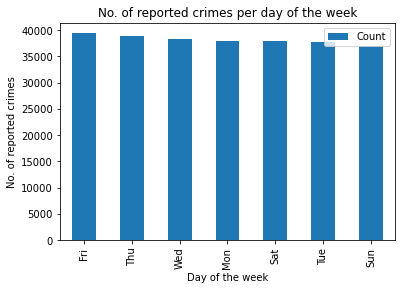

In [120]:
cp.sort_values('Count', ascending=False).plot(kind='bar',x='Day_of_week',y='Count')
plt.xlabel('Day of the week')
plt.ylabel('No. of reported crimes')
plt.title('No. of reported crimes per day of the week')

In [123]:
#RDD Setup
psrdd = sc.textFile('police-station.csv')
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [124]:
ps_header = psrdd.first()
ps_rest = psrdd.filter(lambda line: line!=ps_header)
ps_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

In [130]:
#how many police stations are there
ps_rest.map(lambda line: line.split(',')).collect()

[['Headquarters',
  'Headquarters',
  '3510 S Michigan Ave',
  'Chicago',
  'IL',
  '60653',
  'http://home.chicagopolice.org',
  '',
  '',
  '',
  '1177731.401',
  '1881697.404',
  '41.83070169',
  '-87.62339535',
  '"(41.8307016873',
  ' -87.6233953459)"'],
 ['18',
  'Near North',
  '1160 N Larrabee St',
  'Chicago',
  'IL',
  '60610',
  'http://home.chicagopolice.org/community/districts/18th-district-near-north/',
  '312-742-5870',
  '312-742-5771',
  '312-742-5773',
  '1172080.029',
  '1908086.527',
  '41.90324165',
  '-87.64335214',
  '"(41.9032416531',
  ' -87.6433521393)"'],
 ['19',
  'Town Hall',
  '850 W Addison St',
  'Chicago',
  'IL',
  '60613',
  'http://home.chicagopolice.org/community/districts/19th-district-town-hall/',
  '312-744-8320',
  '312-744-4481',
  '312-744-8011',
  '1169730.744',
  '1924160.317',
  '41.94740046',
  '-87.65151202',
  '"(41.9474004564',
  ' -87.651512018)"'],
 ['20',
  'Lincoln',
  '5400 N Lincoln Ave',
  'Chicago',
  'IL',
  '60625',
  'http://

In [ ]:
#display district ID, district Name, Address and Zip ofr police station with District ID 7

In [140]:
(
ps_rest.filter(
                    lambda line: line.split(',')[0] >= '7'
                  ).
                                              map(
                                                  lambda line:(
                                                               line.split(',')[0],
                                                               line.split(',')[1],
                                                               line.split(',')[2],
                                                               line.split(',')[5]
                                                               )
                                                  ).collect()
)

[('Headquarters', 'Headquarters', '3510 S Michigan Ave', '60653'),
 ('7', 'Englewood', '1438 W 63rd St', '60636'),
 ('8', 'Chicago Lawn', '3420 W 63rd St', '60629'),
 ('9', 'Deering', '3120 S Halsted St', '60608')]

In [ ]:
#police station 10 and 11 are geographically close to each other. display distric tid, distric name address and  zip code


In [141]:
(
    ps_rest.filter( 
                    lambda line: line.split(',')[0] in ['10','11']
                  ).
                        map(
                            
                        lambda line:(
                                                               line.split(',')[0],
                                                               line.split(',')[1],
                                                               line.split(',')[2],
                                                               line.split(',')[5]
                                                               )
                                                  ).collect()
)

[('10', 'Ogden', '3315 W Ogden Ave', '60623'),
 ('11', 'Harrison', '3151 W Harrison St', '60612')]